In [1]:
%config IPCompleter.greedy=True


### Loading packages and libraries 

In [1]:
import itertools
import numpy as np
from Bio import Align
from Bio import SeqIO
from Bio import pairwise2
from Bio.SubsMat.MatrixInfo import blosum62
import csv
import pandas as pd
from Bio.SeqRecord import SeqRecord
from tqdm import tqdm
import random
from random import randint
from sklearn.model_selection  import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import features_extraction_utility.kmer as kmer
from sklearn.svm import SVC
from xgboost import XGBClassifier
# import the metrics class
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc, classification_report
from sklearn import metrics
# import required modules for plotig
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
seed =45

# Reading Interacting lncRNAs

In [2]:
df_nc_seq= pd.read_csv('../Data/NpInter2 Interacting LncRNAs/NP_V2_LncRNAsSequences_clean2.csv')
df_nc_seq.shape

(1925, 11)

In [3]:
df_nc_seq.nunique()

nncid           1923
accn             365
class              2
organism           1
name               2
ref                6
transcriptID    1923
url                2
cpcScore        1912
cnci            1917
sequence        1923
dtype: int64

# Reading interacting proteins

In [4]:
df_p_seq = pd.read_csv('..\Data\\NpInter2 Interacting Protiens\\Np_pSeq_26_1923.csv')
df_p_seq.shape

(25, 4)

In [5]:
df_p_seq.nunique()

Entry                    25
Sequence                 25
Cross-reference (PDB)    20
Entry name               25
dtype: int64

# Reading np inter v 2 interactions

In [6]:
df_NPInter2 = pd.read_csv('../data/NPInter_v2.0 homo_sapiens_type_lncrna.csv')
df_NPInter2.shape


(5353, 16)

In [7]:
df_NPInter2.prIdentifier=df_NPInter2.prIdentifier.str.strip()

In [8]:
df_NPInter2.nunique()

interID               4895
ncID                  1924
ncType                   1
ncIdentifier          1923
ncName                1924
PartnerID               22
prType                   1
prIdentifier            25
InteractionPartner      22
interDescription        24
experiment               7
pubmed                  14
organism                 1
tag                      1
interClass               1
interLevel               1
dtype: int64

### Reading Protein similarity scores 

In [9]:
# read protein similarites
df_pr_sim = pd.read_csv('../Data/NpInter2 Interacting Protiens/Protein-Protein Sequence Similarity/Protien-Protien_Similarity_26_1923.csv')
df_pr_sim.nunique()

Query_Seq_ID        25
Target_Seq_ID       25
Align_Score        190
Normalize_Score     30
Identity           283
Similarity         289
dtype: int64

### Reading LncRNA similarity scores

In [10]:
# df_lnc_sim = pd.read_csv("../Data/NpInter2 Interacting LncRNAs/LncRNA-LncRNA Sequence Similarity/LncRNA-LncRNA_Similarity.csv")
# df_lnc_sim.shape

In [11]:
# df_lnc_sim.nunique()

### adding the nncid with respect to NONCODEID

In [12]:
# df_nc22= pd.read_csv("../Data/NpInter2 Interacting LncRNAs/NP_V2_LncRNAsSequences_clean.csv")
# df_nc22.shape

In [13]:
# noncode_dict=dict(zip(df_nc22.NONCODEID,df_nc22.nncid))


In [14]:
# def label_nonecodeid_to_nncid (row, noncode_dict):
#     if row['Query_Seq_ID'] in  noncode_dict:
#         #print( noncode_dict[row['Query_Seq_ID']])
#         return noncode_dict[row['Query_Seq_ID']]
    

In [15]:

# df_lnc_sim['nncid'] = df_lnc_sim.apply (lambda row: label_nonecodeid_to_nncid(row,noncode_dict), axis=1)
# df_lnc_sim.nunique()

In [16]:
# def label_nonecodeid_to_nncid2 (row, noncode_dict):
#     if row['Target_Seq_ID'] in  noncode_dict:
#         #print( noncode_dict[row['Query_Seq_ID']])
#         return noncode_dict[row['Target_Seq_ID']]

In [17]:
# df_lnc_sim['nncid_target'] = df_lnc_sim.apply (lambda row: label_nonecodeid_to_nncid2(row,noncode_dict), axis=1)
# df_lnc_sim.nunique()

In [18]:
# df_lnc_sim = df_lnc_sim[df_lnc_sim.nncid != 'n363337']

In [19]:
# #print(df_lnc_sim.nunique())
# df_lnc_sim.head()

### filtering the NPInterV2 interactions with respect to lncRNAs similarity items

In [20]:
# df_np2_344 = df_NPInter2[df_NPInter2['ncIdentifier'].isin(df_lnc_sim.nncid)]
# df_np2_344.nunique()

In [21]:
# # filtering the similarities according to target ids
# df_lnc_sim343 = df_lnc_sim[df_lnc_sim['nncid_target'].isin(df_np2_344.ncIdentifier)]
# df_lnc_sim343.nunique()

In [22]:
# df_lnc_sim343.shape

In [23]:
# df_lnc_sim343.columns

In [24]:
# # adding self similarity score for each nncid
# lst_lnc_343 = df_lnc_sim343.nncid.unique()
# for nc in lst_lnc_343:
#     df_lnc_sim343=df_lnc_sim343.append({'Query_Seq_ID':nc, 'Target_Seq_ID':nc ,'Align_Score': 100,'Normalize_Score':1.0,
#                          'Identity':100, 'Similarity':100,'nncid':nc,'nncid_target':nc}, ignore_index=True)
# df_lnc_sim343.shape    

In [25]:
# df_np2_344.shape

In [26]:
# #balanceing protein seq data
# df_p_seq=df_p_seq[df_p_seq.Entry.isin(df_np2_344.prIdentifier)]
# df_p_seq.nunique()

In [27]:
# df_np2_344=df_np2_344[df_np2_344.prIdentifier.isin(df_p_seq.Entry)]
# df_np2_344.nunique()

In [28]:
# df_pr_sim19=df_pr_sim[df_pr_sim['Query_Seq_ID'].isin(df_p_seq.Entry)]
# df_pr_sim19=df_pr_sim19[df_pr_sim19['Target_Seq_ID'].isin(df_p_seq.Entry)]
# df_pr_sim19.nunique()

### preparing the features set for NPInterV2 dataset

In [29]:
# creating features from npinter v2

def prepare_NPinter_feature(df_p_seq, df_nc_seq, df_NPInter2):
    # create dict of proteins
    pro_dict=dict(zip(df_p_seq.Entry,df_p_seq.Sequence))
    # create dict of lncRnas
    lnc_dict = dict(zip(df_nc_seq.nncid,df_nc_seq.sequence))
    # positive set
    posi_set = set()
    pro_set = set()
    X_features =[]
    Y_labels =[]
    df_interact = pd.DataFrame(columns=['ncIdentifier', 'prIdentifier', 'interaction'])
    # geting positive class
    for index, row in tqdm(df_NPInter2.iterrows()):
        ncIdentifier=row['ncIdentifier'].strip()
        prIdentifier =row['prIdentifier'].strip()
        posi_set.add((ncIdentifier, prIdentifier))
        pro_set.add(prIdentifier)
        if (ncIdentifier in lnc_dict) and (prIdentifier in pro_dict):
            protein_seq=pro_dict[prIdentifier]
            RNA_seq = lnc_dict[ncIdentifier]
            df_interact = df_interact.append({'ncIdentifier': ncIdentifier, 'prIdentifier': prIdentifier, 'interaction': 1}, ignore_index=True)
            pro_fea = kmer.make_kmer_list_from_seq(k=3, sequence_type='Protein', seq=protein_seq,revcomp=False)[0]
            lnc_fea = kmer.make_kmer_list_from_seq(k=3, sequence_type='RNA', seq=RNA_seq.replace('T','U'),revcomp=False)[0]
            #X_features.append((sim_lst_pro,sim_lst_lnc))
            X_features.append(pro_fea + lnc_fea)
            Y_labels.append(1)

        else:
            print(prIdentifier)
    #getting negative data or class
    pro_list = list(pro_set)   
    total_pro_len = len(pro_list)  
    for index, row in tqdm(df_NPInter2.iterrows()):
        ncIdentifier=row['ncIdentifier'].strip()
        prIdentifier =row['prIdentifier'].strip()
        #posi_set.add((ncIdentifier, prIdentifier))
        for val in range(50):
                    random_choice = randint(0,total_pro_len-1)
                    select_pro = pro_list[random_choice]
                    selec_nega= (ncIdentifier, select_pro)
                    if selec_nega not in posi_set:
                        posi_set.add(selec_nega)
                        #print selec_nega
                        break
        if (ncIdentifier in lnc_dict) and (select_pro in pro_dict):
            protein_seq=pro_dict[prIdentifier]
            RNA_seq = lnc_dict[ncIdentifier]
            df_interact = df_interact.append({'ncIdentifier': ncIdentifier, 'prIdentifier': prIdentifier, 'interaction': 1}, ignore_index=True)
            pro_fea = kmer.make_kmer_list_from_seq(k=3, sequence_type='Protein', seq=protein_seq,revcomp=False)[0]
            lnc_fea = kmer.make_kmer_list_from_seq(k=3, sequence_type='RNA', seq=RNA_seq.replace('T','U'),revcomp=False)[0]
            #X_features.append((sim_lst_pro,sim_lst_lnc))
            X_features.append(pro_fea + lnc_fea)
            Y_labels.append(0)
    return df_interact,np.array(X_features) , Y_labels

        
    


In [30]:
df_interact, X_Features, Y_Labels=prepare_NPinter_feature(df_p_seq, df_nc_seq, df_NPInter2)
df_interact.shape

5353it [2:10:42,  1.62s/it]
5353it [2:06:55,  1.50s/it]


(10706, 3)

In [23]:
Y_Labels[0]

1

In [24]:
import csv



with open("Y_Labels.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(map(lambda x: [x], Y_Labels))    
    
print("done...")    

done...


In [32]:
#df_lnc_sim.count()

In [33]:
# save pairs to disk
df_interact.to_csv('../data/NpInterV2_Pairs_full.csv')

### Model



#### train test split

In [31]:
#spliting train test
X_train,X_test,y_train,y_test=train_test_split(X_Features,Y_Labels,test_size=0.25,random_state=0)
len(X_train)

8029

In [43]:
X_train[0]

array([ -7.22159081,  -1.18680749,  -5.69708168,   0.75730705,
        20.07440649, -12.27015461, -15.69741725,   5.86825684,
       -10.72471259, -32.73350338,  -1.56891438,  -1.11565434,
       -17.79657727,  -0.58463558,  -1.21927887,   3.31816995,
         0.5925765 ,  48.28018991,  -0.7872663 ,  -1.54973504,
        -0.51055081,   1.07248809])

In [32]:
len(X_train[0])

8064

## PCA

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [35]:
len(X_train[0])

22

### building model

In [36]:
def train_model(model,X_train,y_train):
        
    # fiting kfold model
    kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=seed)
    pred_test_full =0
    cv_score =[]
    i=1
    y_train1=np.array(y_train)
    #y_train1=y_train1.reshape(-1,1)
    #print(y_train.shape)
    #print(X_train.shape)

    for train_index,test_index in kf.split(X_train,y_train1):
        print('{} of KFold {}'.format(i,kf.n_splits))
        #print(train_index)
        #print(test_index)
        xtr,xvl = X_train[train_index],X_train[test_index]
        ytr,yvl = y_train1[train_index],y_train1[test_index]

        #model
        #medel = LogisticRegression(solver='lbfgs')#LogisticRegression(C=2)
        model.fit(xtr,ytr)
        score = roc_auc_score(yvl,model.predict(xvl))
        print('ROC AUC score:',score)
        cv_score.append(score)    
        pred_test = model.predict_proba(X_test)[:,1]
        pred_test_full +=pred_test
        i+=1
    return model,xtr,xvl, ytr,yvl,cv_score    

### Logistic Regration Model


In [37]:
model = LogisticRegression(solver='lbfgs')#LogisticRegression(C=2)
model,xtr,xvl, ytr,yvl,cv_score =train_model(model,X_train,y_train)

1 of KFold 5
ROC AUC score: 0.48193704487820765
2 of KFold 5
ROC AUC score: 0.4918967964078822
3 of KFold 5
ROC AUC score: 0.4925629512442904
4 of KFold 5
ROC AUC score: 0.4959596429596197
5 of KFold 5
ROC AUC score: 0.49751216739603743


In [38]:
print('Confusion matrix on validation set: \n',confusion_matrix(yvl,model.predict(xvl)))
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))


Confusion matrix on validation set: 
 [[372 422]
 [384 427]]
Cv [0.48193704487820765, 0.4918967964078822, 0.4925629512442904, 0.4959596429596197, 0.49751216739603743] 
Mean cv Score 0.49197372057720745


In [39]:
print("Results on validation set: ")
print("Accuracy:",metrics.accuracy_score(yvl, model.predict(xvl)))
print("Precision:",metrics.precision_score(yvl, model.predict(xvl)))
print("Recall:",metrics.recall_score(yvl, model.predict(xvl)))
print("F1 Score:",metrics.f1_score(yvl, model.predict(xvl)))

Results on validation set: 
Accuracy: 0.49781931464174456
Precision: 0.502944640753828
Recall: 0.5265104808877928
F1 Score: 0.5144578313253012


In [40]:
print("Results on test set:")
y_pred=model.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

Results on test set:


array([[603, 776],
       [654, 644]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

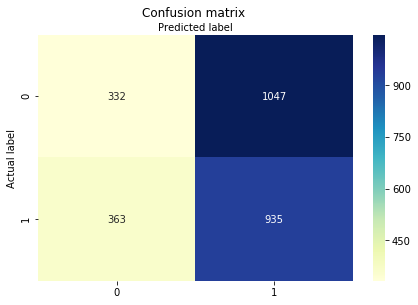

In [40]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix ', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [41]:
print("Results on test set: ")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Results on test set: 
Accuracy: 0.4658199477026522
Precision: 0.4535211267605634
Recall: 0.49614791987673346
F1 Score: 0.4738778513612951


In [ ]:
#lr.coef_


In [42]:
print("validation set score:")
print(model.score(xvl,yvl))

print("test set score:")
print(model.score(X_test,y_test))


validation set score:
0.49221183800623053
test set score:
0.4732909973851326


### Reciever Operating Characteristics


Text(0.5, 0, 'False positive rate')

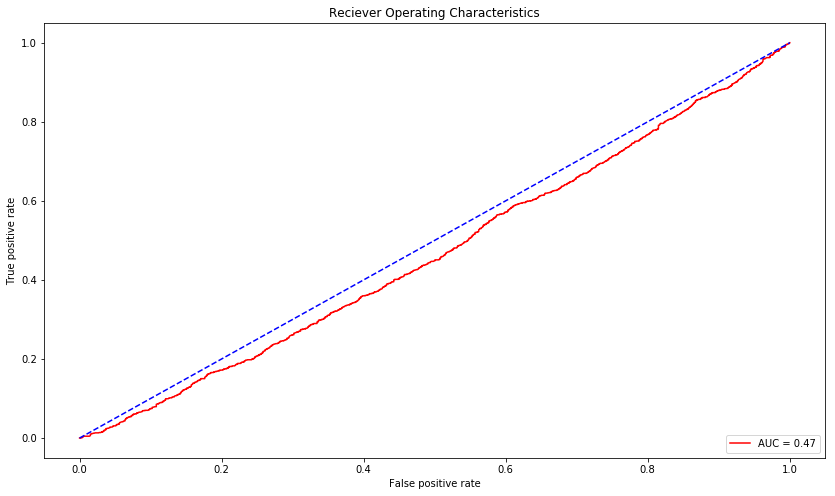

In [43]:
# proba = model.predict_proba(xvl)[:,1]
# frp,trp, threshold = roc_curve(yvl,proba)
proba = model.predict_proba(X_test)[:,1]
frp,trp, threshold = roc_curve(y_test,proba)
roc_auc_ = auc(frp,trp)

plt.figure(figsize=(14,8))
plt.title('Reciever Operating Characteristics')
plt.plot(frp,trp,'r',label = 'AUC = %0.2f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

### XGBoost Model


In [44]:
model = XGBClassifier(learning_rate=0.05, n_estimators=50, max_depth=4,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)

model,xtr,xvl, ytr,yvl,cv_score =train_model(model,X_train,y_train)

1 of KFold 5
ROC AUC score: 0.3599198132595057
2 of KFold 5
ROC AUC score: 0.3280800936804473
3 of KFold 5
ROC AUC score: 0.3570442578073502
4 of KFold 5
ROC AUC score: 0.34420895082552017
5 of KFold 5
ROC AUC score: 0.3648331971910165


In [45]:
print('Confusion matrix on validation set: \n',confusion_matrix(yvl,model.predict(xvl)))
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))


Confusion matrix on validation set: 
 [[269 525]
 [494 317]]
Cv [0.3599198132595057, 0.3280800936804473, 0.3570442578073502, 0.34420895082552017, 0.3648331971910165] 
Mean cv Score 0.35081726255276796


In [46]:
print("Results on validation set: ")
print("Accuracy:",metrics.accuracy_score(yvl, model.predict(xvl)))
print("Precision:",metrics.precision_score(yvl, model.predict(xvl)))
print("Recall:",metrics.recall_score(yvl, model.predict(xvl)))
print("F1 Score:",metrics.f1_score(yvl, model.predict(xvl)))

Results on validation set: 
Accuracy: 0.36510903426791275
Precision: 0.37648456057007124
Recall: 0.3908754623921085
F1 Score: 0.3835450695704779


In [47]:
print("Results on test set:")
y_pred=model.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

Results on test set:


array([[460, 919],
       [813, 485]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

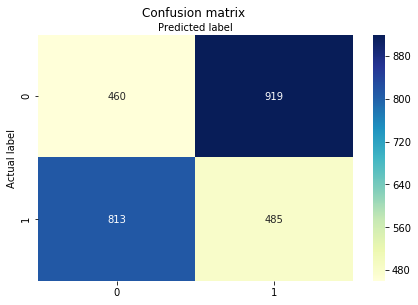

In [48]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix ', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [49]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.35300709749719833
Precision: 0.3454415954415954
Recall: 0.3736517719568567
F1 Score: 0.3589933382679497


In [ ]:
#lr.coef_


In [50]:
print("validation set score:")
print(model.score(xvl,yvl))

print("test set score:")
print(model.score(X_test,y_test))


validation set score:
0.36510903426791275
test set score:
0.35300709749719833


### Reciever Operating Characteristics


Text(0.5, 0, 'False positive rate')

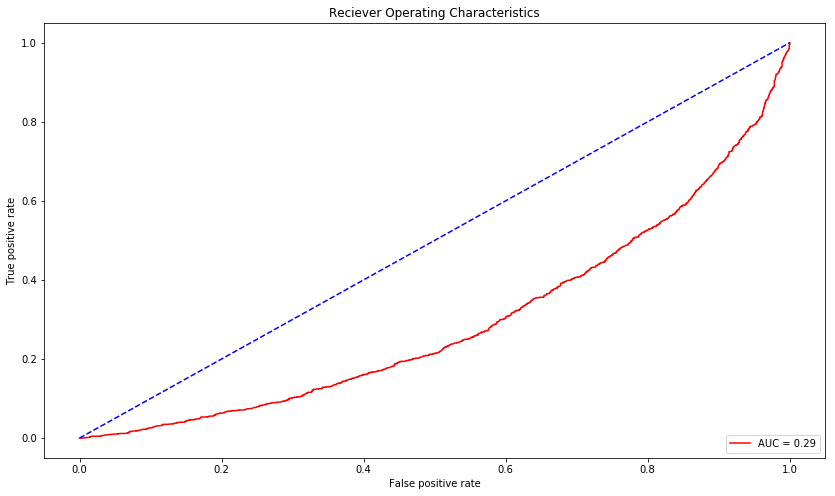

In [51]:
#proba = model.predict_proba(xvl)[:,1]
#frp,trp, threshold = roc_curve(yvl,proba)
proba = model.predict_proba(X_test)[:,1]
frp,trp, threshold = roc_curve(y_test,proba)
roc_auc_ = auc(frp,trp)

plt.figure(figsize=(14,8))
plt.title('Reciever Operating Characteristics')
plt.plot(frp,trp,'r',label = 'AUC = %0.2f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

### SVM

In [50]:
model = SVC(kernel='linear',probability=True)

model,xtr,xvl, ytr,yvl,cv_score =train_model(model,X_train,y_train)

1 of KFold 5
ROC AUC score: 0.48193704487820765
2 of KFold 5
ROC AUC score: 0.48771762479740055
3 of KFold 5
ROC AUC score: 0.49257535925055645
4 of KFold 5
ROC AUC score: 0.4862441740533079
5 of KFold 5
ROC AUC score: 0.5041223168834073


In [51]:
print('Confusion matrix on validation set: \n',confusion_matrix(yvl,model.predict(xvl)))
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))


Confusion matrix on validation set: 
 [[359 435]
 [360 451]]
Cv [0.48193704487820765, 0.48771762479740055, 0.49257535925055645, 0.4862441740533079, 0.5041223168834073] 
Mean cv Score 0.4905193039725759


In [52]:
print("Results on validation set: ")
print("Accuracy:",metrics.accuracy_score(yvl, model.predict(xvl)))
print("Precision:",metrics.precision_score(yvl, model.predict(xvl)))
print("Recall:",metrics.recall_score(yvl, model.predict(xvl)))
print("F1 Score:",metrics.f1_score(yvl, model.predict(xvl)))

Results on validation set: 
Accuracy: 0.5046728971962616
Precision: 0.5090293453724605
Recall: 0.5561035758323057
F1 Score: 0.5315262227460223


In [53]:
print("Results on test set:")
y_pred=model.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

Results on test set:


array([[576, 803],
       [622, 676]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

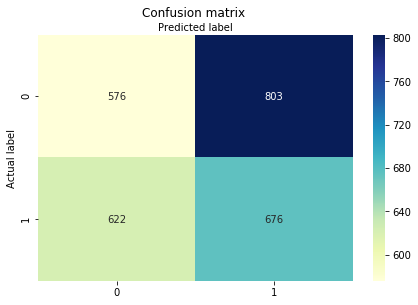

In [54]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix ', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [55]:
print("Results on test set:")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Results on test set:
Accuracy: 0.4676877101232723
Precision: 0.4570655848546315
Recall: 0.5208012326656395
F1 Score: 0.4868563197695355


In [56]:
#lr.coef_


In [48]:
print("validation set score:")
print(model.score(xvl,yvl))

print("test set score:")
print(model.score(X_test,y_test))


validation set score:
0.49781931464174456
test set score:
0.4658199477026522


### Reciever Operating Characteristics


Text(0.5, 0, 'False positive rate')

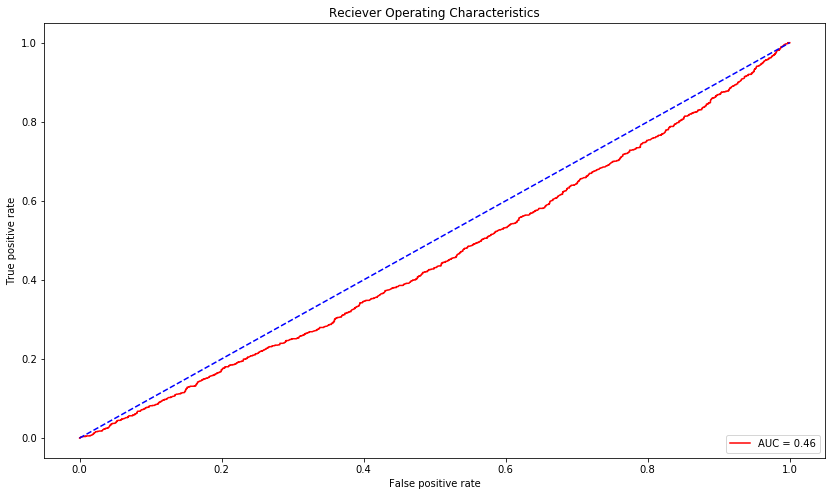

In [49]:
#proba = model.predict_proba(xvl)[:,1]
#frp,trp, threshold = roc_curve(yvl,proba)
proba = model.predict_proba(X_test)[:,1]
frp,trp, threshold = roc_curve(y_test,proba)
roc_auc_ = auc(frp,trp)

plt.figure(figsize=(14,8))
plt.title('Reciever Operating Characteristics')
plt.plot(frp,trp,'r',label = 'AUC = %0.2f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')